# Zero to Hero

## 1.02  Carga del dataset desde la nube y operaciones básicas

Se muestra una alternativa a cargar el dataset directamente desde la nube, que funciona desde Kaggle, Google Colab
<br>
Si se está corriendo desde la PC local, siempre es preferible cargar el archivo del disco local.

In [1]:
library( "data.table")   #cargo la libreria  data.table

"https://storage.googleapis.com/dmeyf2022/competencia1_2022.csv" es el dataset de la Primera Competencia de la asignatura

In [2]:
dataset <- fread( "https://storage.googleapis.com/dmeyf2022/competencia1_2022.csv")

Obviamente ahora el leer el archivo demora bastante, ya que se está bajando por internet, están viajando 156MB

### Ahora, algunas operaciones básicas con el dataset

cantidad de registros y columnas

In [3]:
nrow( dataset )
ncol( dataset )

[1] 324242

[1] 155

Otra forma de ver la cantidad de registros del dataset, al  *estilo data table*
<br>
El .N  es la cantidad de registros y va en la segunda poscion  dataset[ 1, 2, 3 ]

In [4]:
dataset[ , .N ]

[1] 324242

Ahora hacemos la apertura por el periodo, el campo  foto_mes

In [5]:
dataset[ , .N, foto_mes ]

foto_mes,N
<int>,<int>
202101,161342
202103,162900


nombre de las columnas del dataset

In [6]:
colnames( dataset )

[1] "numero_de_cliente"                   
  [2] "foto_mes"                            
  [3] "active_quarter"                      
  [4] "cliente_vip"                         
  [5] "internet"                            
  [6] "cliente_edad"                        
  [7] "cliente_antiguedad"                  
  [8] "mrentabilidad"                       
  [9] "mrentabilidad_annual"                
 [10] "mcomisiones"                         
 [11] "mactivos_margen"                     
 [12] "mpasivos_margen"                     
 [13] "cproductos"                          
 [14] "tcuentas"                            
 [15] "ccuenta_corriente"                   
 [16] "mcuenta_corriente_adicional"         
 [17] "mcuenta_corriente"                   
 [18] "ccaja_ahorro"                        
 [19] "mcaja_ahorro"                        
 [20] "mcaja_ahorro_adicional"              
 [21] "mcaja_ahorro_dolares"                
 [22] "cdescubierto_preacordado"            
 [23] "mcuentas_saldo"                      
 [24] "ctarjeta_debito"                     
 [25] "ctarjeta_debito_transacciones"       
 [26] "mautoservicio"                       
 [27] "ctarjeta_visa"                       
 [28] "ctarjeta_visa_transacciones"         
 [29] "mtarjeta_visa_consumo"               
 [30] "ctarjeta_master"                     
 [31] "ctarjeta_master_transacciones"       
 [32] "mtarjeta_master_consumo"             
 [33] "cprestamos_personales"               
 [34] "mprestamos_personales"               
 [35] "cprestamos_prendarios"               
 [36] "mprestamos_prendarios"               
 [37] "cprestamos_hipotecarios"             
 [38] "mprestamos_hipotecarios"             
 [39] "cplazo_fijo"                         
 [40] "mplazo_fijo_dolares"                 
 [41] "mplazo_fijo_pesos"                   
 [42] "cinversion1"                         
 [43] "minversion1_pesos"                   
 [44] "minversion1_dolares"                 
 [45] "cinversion2"                         
 [46] "minversion2"                         
 [47] "cseguro_vida"                        
 [48] "cseguro_auto"                        
 [49] "cseguro_vivienda"                    
 [50] "cseguro_accidentes_personales"       
 [51] "ccaja_seguridad"                     
 [52] "cpayroll_trx"                        
 [53] "mpayroll"                            
 [54] "mpayroll2"                           
 [55] "cpayroll2_trx"                       
 [56] "ccuenta_debitos_automaticos"         
 [57] "mcuenta_debitos_automaticos"         
 [58] "ctarjeta_visa_debitos_automaticos"   
 [59] "mttarjeta_visa_debitos_automaticos"  
 [60] "ctarjeta_master_debitos_automaticos" 
 [61] "mttarjeta_master_debitos_automaticos"
 [62] "cpagodeservicios"                    
 [63] "mpagodeservicios"                    
 [64] "cpagomiscuentas"                     
 [65] "mpagomiscuentas"                     
 [66] "ccajeros_propios_descuentos"         
 [67] "mcajeros_propios_descuentos"         
 [68] "ctarjeta_visa_descuentos"            
 [69] "mtarjeta_visa_descuentos"            
 [70] "ctarjeta_master_descuentos"          
 [71] "mtarjeta_master_descuentos"          
 [72] "ccomisiones_mantenimiento"           
 [73] "mcomisiones_mantenimiento"           
 [74] "ccomisiones_otras"                   
 [75] "mcomisiones_otras"                   
 [76] "cforex"                              
 [77] "cforex_buy"                          
 [78] "mforex_buy"                          
 [79] "cforex_sell"                         
 [80] "mforex_sell"                         
 [81] "ctransferencias_recibidas"           
 [82] "mtransferencias_recibidas"           
 [83] "ctransferencias_emitidas"            
 [84] "mtransferencias_emitidas"            
 [85] "cextraccion_autoservicio"            
 [86] "mextraccion_autoservicio"            
 [87] "ccheques_depositados"                
 [88] "mcheques_depositados"                
 [89] "ccheques_emitidos"                 

Exploración de clase_ternaria.

In [7]:
dataset[  , .N, list( foto_mes, clase_ternaria) ]

foto_mes,clase_ternaria,N
<int>,<chr>,<int>
202101,CONTINUA,159828
202101,BAJA+1,664
202101,BAJA+2,850
202103,,162900


###  varias formas de contar los BAJA+2

todas las formas dan el mismo resultado

In [8]:
nrow(  dataset[ clase_ternaria=="BAJA+2" ])

[1] 850

In [9]:
dataset[ clase_ternaria=="BAJA+2", .N ] #el autentico estilo data.table

[1] 850

In [10]:
dataset[  , sum(clase_ternaria=="BAJA+2")]

[1] 850

### Conteo de proporcion de BAJA+2 en el dataset

In [11]:
dataset[ foto_mes==202101  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 0.005268312

Conteo de la proporcion de BAJA+2 en un predicado

In [12]:
dataset[ foto_mes==202101 & ctrx_quarter < 20  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 0.04120811

### Lift del predicado  ctrx_quarter  vs el universo

forma brutal de calcularlo

In [13]:
dataset[ foto_mes==202101 & ctrx_quarter < 20  ,  sum(clase_ternaria=="BAJA+2")/.N]  /dataset[ foto_mes==202101  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 7.821881

### Ganancias del dataset

Agregado de la columna ganancia al dataset

Primero le asigno a TODOS los registros el valor de  -2000
<br>
la asignacion se hace con el  :=

In [14]:
dataset[ foto_mes==202101, ganancia := -2000]

y finalmente a los  BAJA+2 les asigno 78000

In [15]:
dataset[ foto_mes==202101 & clase_ternaria=="BAJA+2", ganancia := 78000]

Calculo la ganancia que tendria una campaña en donde envío estímulo a TODOS los clientes

In [16]:
dataset[ foto_mes==202101 , sum(ganancia)]

[1] -254684000

Si le enviara estímulo a todos, se **pierden**  254 millones de pesos

### Ganancias de predicados univariados

Calculo la ganancia de un predicado simple
ctrx_quarter < 20

In [17]:
dataset[ foto_mes==202101 & ctrx_quarter < 20,  sum( ganancia )  ]

[1] 15670000

Ahora  la ganancia de  *ctrx_quarter < 4 *

In [18]:
dataset[ foto_mes==202101 & ctrx_quarter < 4,  sum( ganancia )  ]

[1] 12588000

Ahora, en forma brutal e ineficiente, busco donde esta el mejor corte de  ctrx_quarter
<br>
Ya resolveremos esto en forma inteligente más adelante

In [19]:
for(  transacciones  in   0:50)
{
   cat(  transacciones, dataset[  foto_mes==202101 & ctrx_quarter < transacciones,  sum( ganancia )  ] , "\n")    
}

0 0 
1 9222000 
2 10746000 
3 10888000 
4 12588000 
5 13342000 
6 1.4e+07 
7 14512000 
8 14640000 
9 15038000 
10 16220000 
11 15740000 
12 16002000 
13 16286000 
14 16720000 
15 16486000 
16 16056000 
17 15700000 
18 15778000 
19 15630000 
20 15670000 
21 15048000 
22 14466000 
23 13866000 
24 13672000 
25 13252000 
26 12698000 
27 12036000 
28 11388000 
29 10288000 
30 9678000 
31 8660000 
32 7680000 
33 6430000 
34 5546000 
35 4496000 
36 3426000 
37 2488000 
38 1582000 
39 538000 
40 -350000 
41 -1266000 
42 -2332000 
43 -3446000 
44 -4858000 
45 -5744000 
46 -6780000 
47 -7816000 
48 -9072000 
49 -10270000 
50 -11772000 


#### Observo que el predicado  ctrx_quarter < 14 tiene la máxima ganancia

### Ganancias de predicado complejo

In [20]:
dataset[  foto_mes==202101 & ctrx_quarter < 20 & mpasivos_margen < 29.8 ,  sum( ganancia )  ]

[1] 17044000

# Enhorabuena ! hemos alcanzado los 17 M de ganancia

### gráficos de densidades

Visualización de la densidad de una variable versus clase_ternaria

In [21]:
library("ggplot2") #cargo la libreria ggplot2

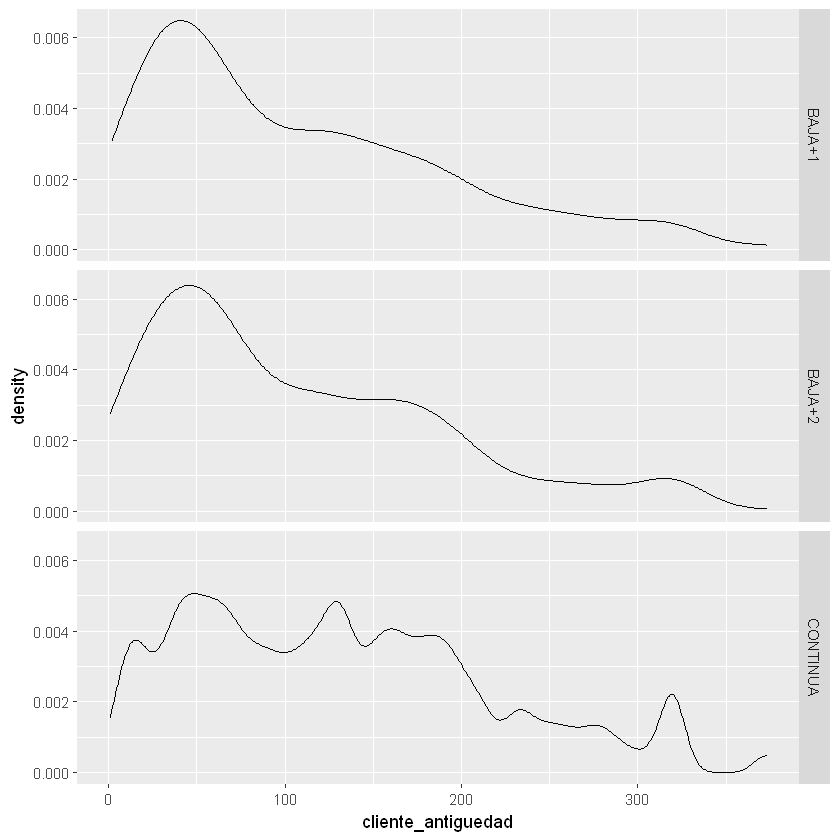

In [22]:
campo <- "cliente_antiguedad" 
ggplot(dataset[ foto_mes==202101] , aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .")

los gráficos salen muy pequeños, busco la documentacion https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html  y agrando los graficos

In [23]:
options(repr.plot.width=15, repr.plot.height=15)

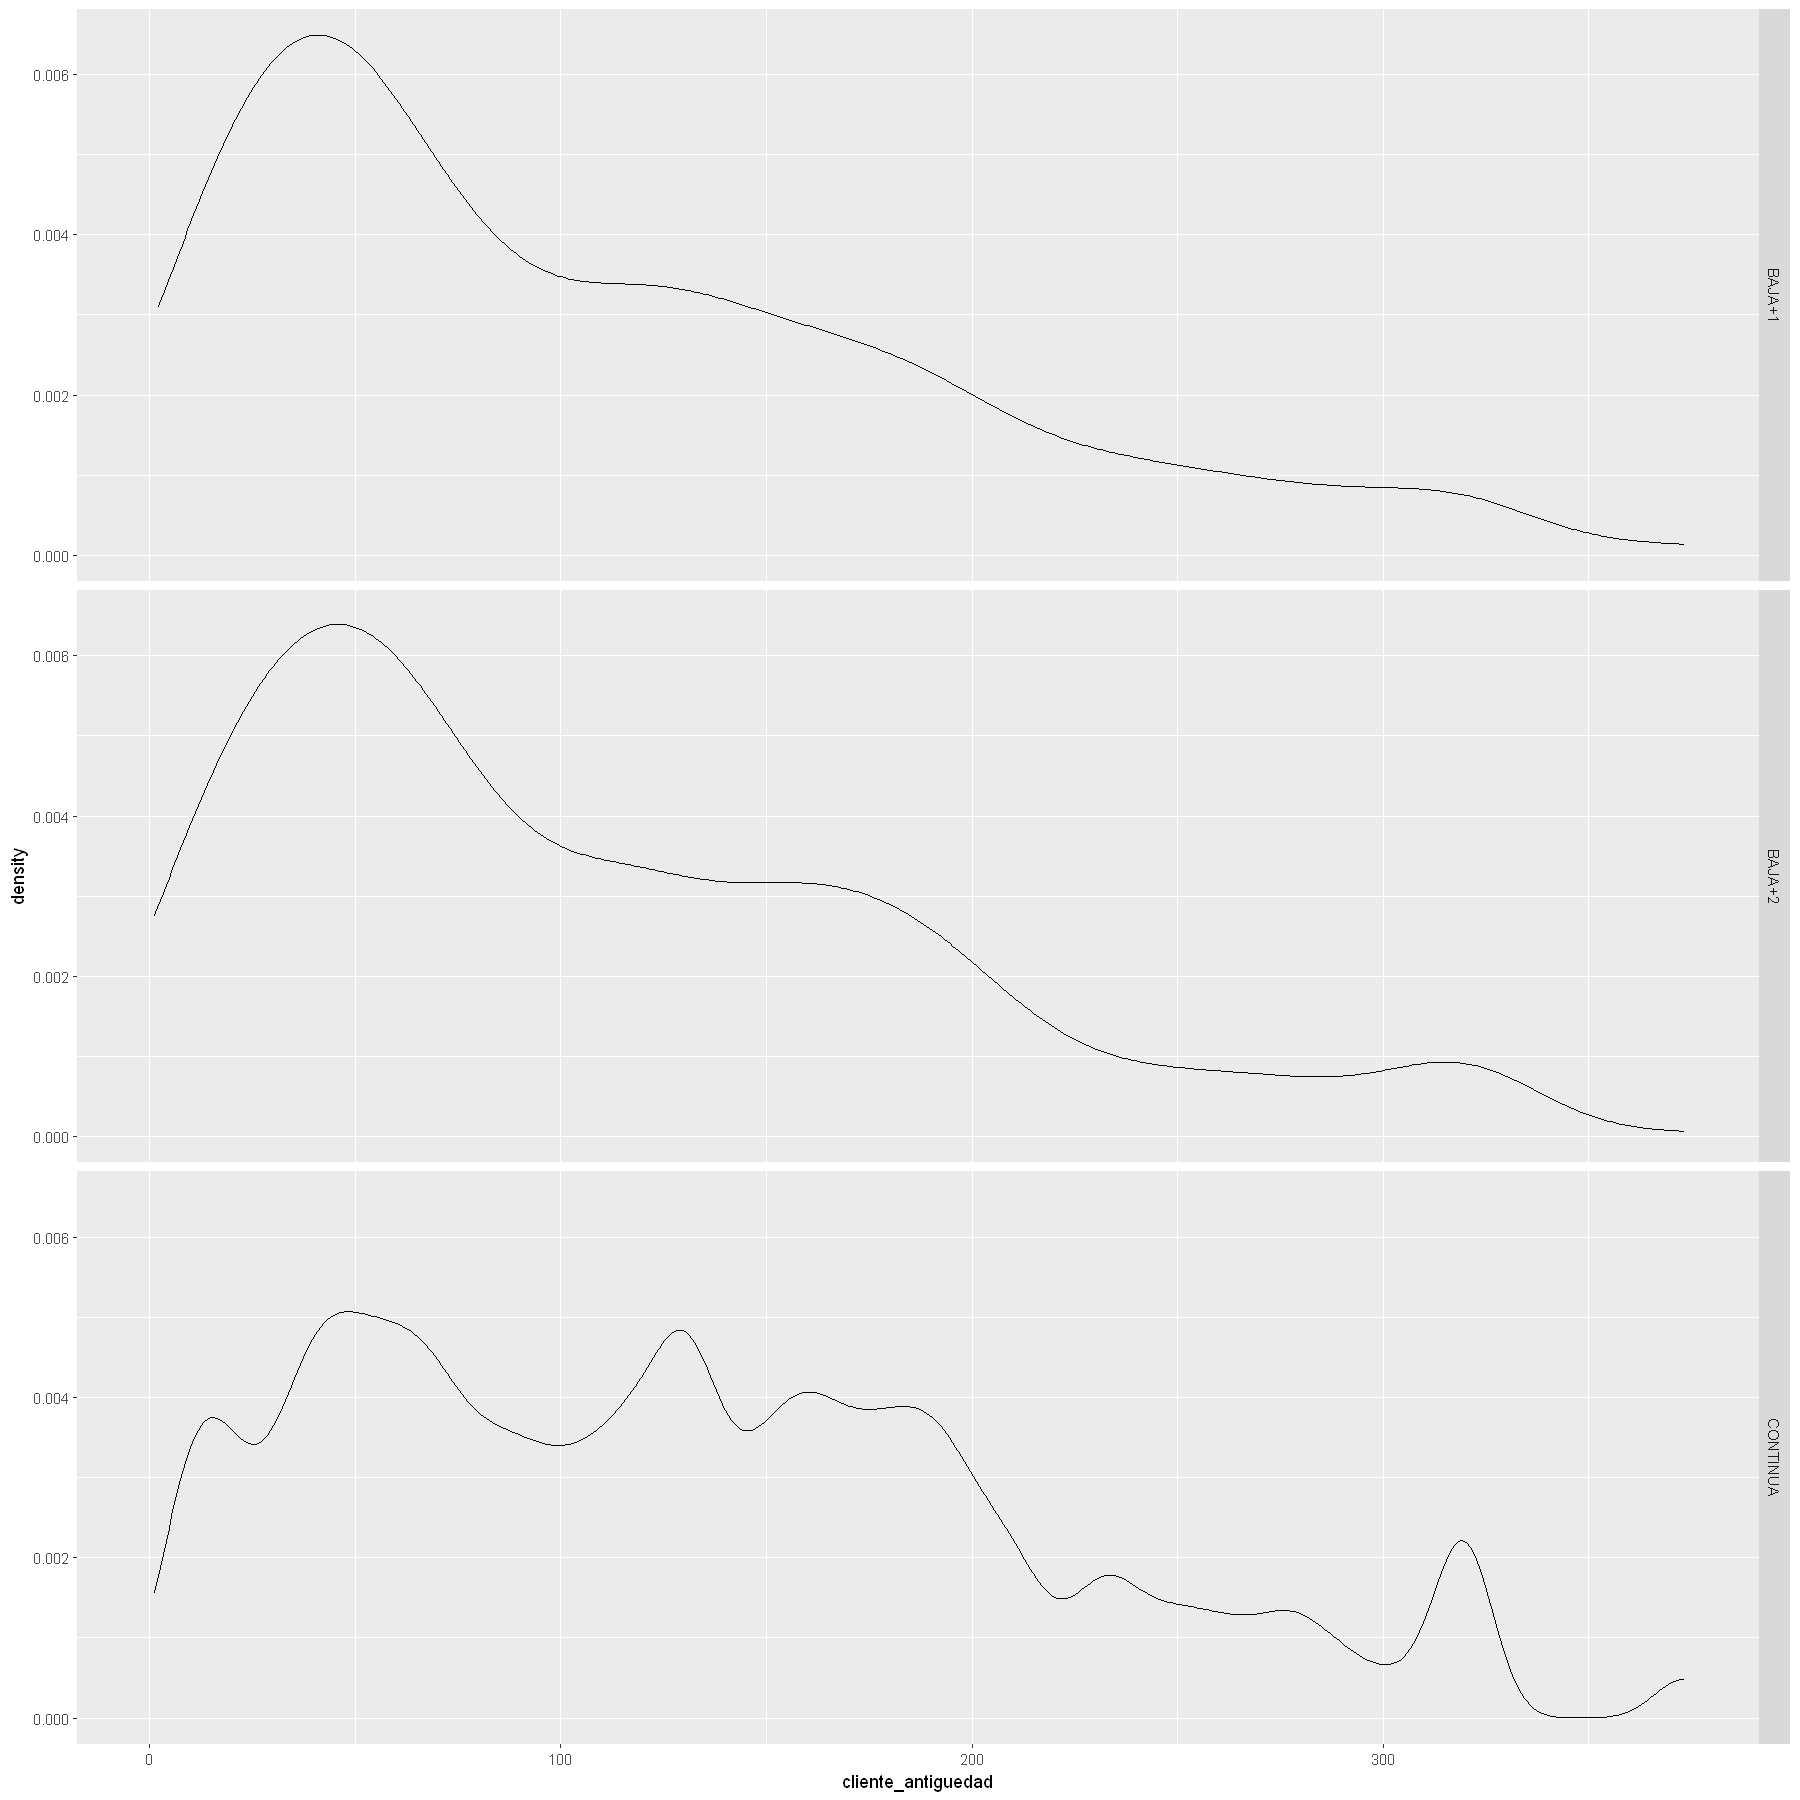

In [24]:
campo <- "cliente_antiguedad" 
ggplot(dataset[ foto_mes==202101], aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .")